In [28]:
# Practica 34: Mediante una conexión a nuestro servidor de datos SQL:
# cargar en un DataFrame con una sentencia SQL, los pedidos que son de Alemania. 
# En otro DataFrame cargar los detalles de pedidos, pero en la sentencia calcular el importe (Precio Unidad * Cantidad). 
# Cargar en otro DataFrame los productos.

#Combinar en un DataFrame nuevo los 3 dataframes, haremos un descuento del 6% a todos los pedidos y hacer una agrupación de importe neto  (importe - descuento) por ciudad destinatario. Esta agrupación la convertiremos a un DataFrame y después Guardar en un fichero EXCEL.



import pyodbc 
import pandas as pd

server = "SERGIOPC\SQLEXPRESS"          #Nombre del servidor
database = "NEPTUNO"                    #Nombre de la base de datos
connection = 'yes'                      #Conexión
conn_str = (
    f'DRIVER={{SQL Server}};'
    f'SERVER={server};'
    f'DATABASE={database};'
    f'TRUSTED_CONNECTION={connection};'
)

try:
    conn = pyodbc.connect(conn_str)
    print("*** Conectado con éxito! ***")
    
except Exception as e:
    print("Fallo de conexión! ", e)



try:

    #los pedidos que son de Alemania.
    sql_pedidos_alemania = "SELECT * FROM Pedidos WHERE PaísDestinatario='Alemania'"
    pedidos_alemania = pd.read_sql(sql_pedidos_alemania, conn)
 
    #detalles de pedidos, calculando el importe (Precio Unidad * Cantidad).
    #  (DP.PrecioUnidad*DP.Cantidad*0.94) AS ImporteNeto
    sql_detalles_pedidos = 'SELECT *, (PrecioUnidad * Cantidad) AS Importe FROM [Detalles de pedidos]'
    detalles_pedidos = pd.read_sql(sql_detalles_pedidos, conn)

    #Cargar en otro DataFrame los productos.
    sql_productos = 'SELECT * FROM Productos'
    productos = pd.read_sql(sql_productos, conn)

    #Combinar en un DataFrame los 3, mediante merge
    pedidos_total = pd.merge(pedidos_alemania, detalles_pedidos, on='IdPedido', how='inner')
    pedidos_total = pd.merge(pedidos_total, productos, on='IdProducto', how='inner')

    #Calculo del descuento, ya hay un campo de descuento, por lo tanto descuento2
    pedidos_total['Descuento2'] = pedidos_total['Importe']*0.06
    pedidos_total['Importe Neto'] = pedidos_total['Importe']- pedidos_total['Descuento2']

    #Vamos a hacer la agrupación, y se lo asignamos a un objeto
    resultado = pedidos_total.groupby(['CiudadDestinatario'])['Importe Neto'].sum()
    #Vamos a convertir el objeto en un dataframe
    resultado = pd.DataFrame(resultado, columns=['Importe Neto'])
    #Vamos a reindexar
    resultado  =resultado.reset_index()
    #Lo guardamos a un excel
    ruta = r"C:\Users\sergi\Desktop\Python\Generados\Pedidos_Alemania.xlsx"
    resultado.to_excel(ruta, sheet_name='Ciudades', header=True, index=False)
    #print(pedidos_total['Importe Neto'])


except Exception as e:
    print("Error de sentencias SQL", e)



*** Conectado con éxito! ***


<>:13: SyntaxWarning: invalid escape sequence '\S'
<>:13: SyntaxWarning: invalid escape sequence '\S'
C:\Users\sergi\AppData\Local\Temp\ipykernel_8424\2969929215.py:13: SyntaxWarning: invalid escape sequence '\S'
  server = "SERGIOPC\SQLEXPRESS"          #Nombre del servidor
C:\Users\sergi\AppData\Local\Temp\ipykernel_8424\2969929215.py:36: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pedidos_alemania = pd.read_sql(sql_pedidos_alemania, conn)
C:\Users\sergi\AppData\Local\Temp\ipykernel_8424\2969929215.py:41: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  detalles_pedidos = pd.read_sql(sql_detalles_pedidos, conn)
C:\Users\sergi\AppData\Local\Temp\ipykernel_8424\2969929215.py:45:

TENEMOS UN DATAFRAME QUE CONTIENE LA AGRUPACIÓN POR CIUDAD E IMPORTE. VAMOS A VER UNA REPRESENTACIÓN GRAFICA, UN GRAFICO CIRCULAR PARA TRABAJAR CON GRAFICOS: 2 LIBRERÍAS: MATPLOTLIB Y SEABORN.
INSTALAMOS:

In [6]:
!pip install matplotlib


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.1 MB 25.4 MB/s eta 0:00:01
   -------------------------- ------------- 5.2/8.1 MB 12.7 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 13.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 17.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 16.8 MB/s eta 0:00:00


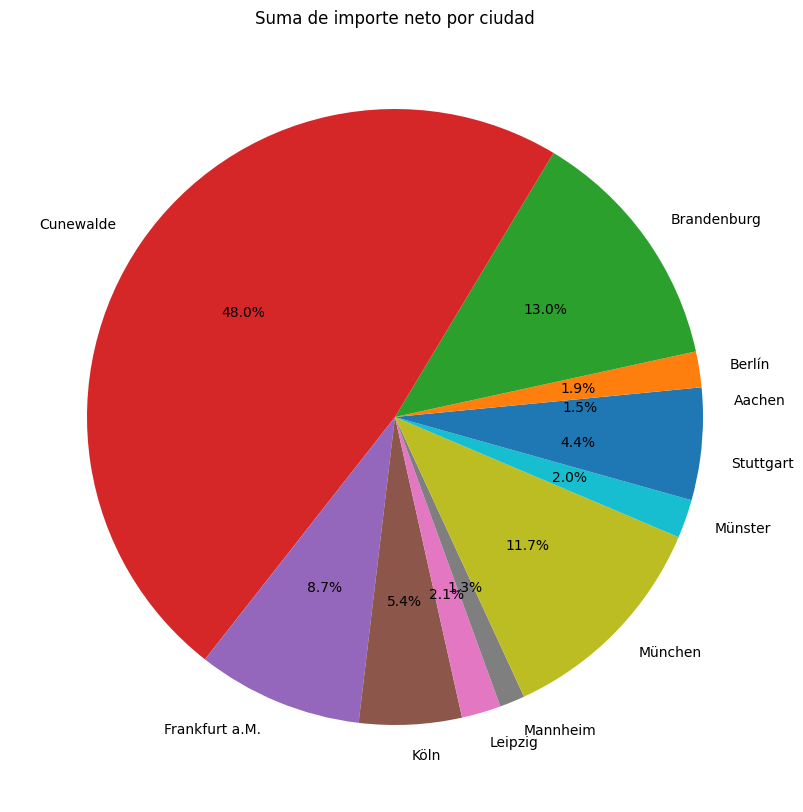

In [54]:
#Grafico circular: importar la clase pyplot de matplotlib
import matplotlib.pyplot as plt 
#from matplotlib import pyplot as plt
#Primero crearemos una figura. Ésta, reserva espacio en el Kernel
#Creamos una figura de nombre grafico:

fig, grafico = plt.subplots()
#el grafico circular es tipo pie (metrica (Importe Neto), dimension (Ciudad destinatario)). Queremos ver el % de cada ciudad 
# con el parámetro autopct: "%.2f%%"

grafico.pie(resultado['Importe Neto'], labels=resultado['CiudadDestinatario'], autopct="%.1f%%")
#Poner un título en el grafico:
grafico.set_title("Suma de importe neto por ciudad")
plt.show();

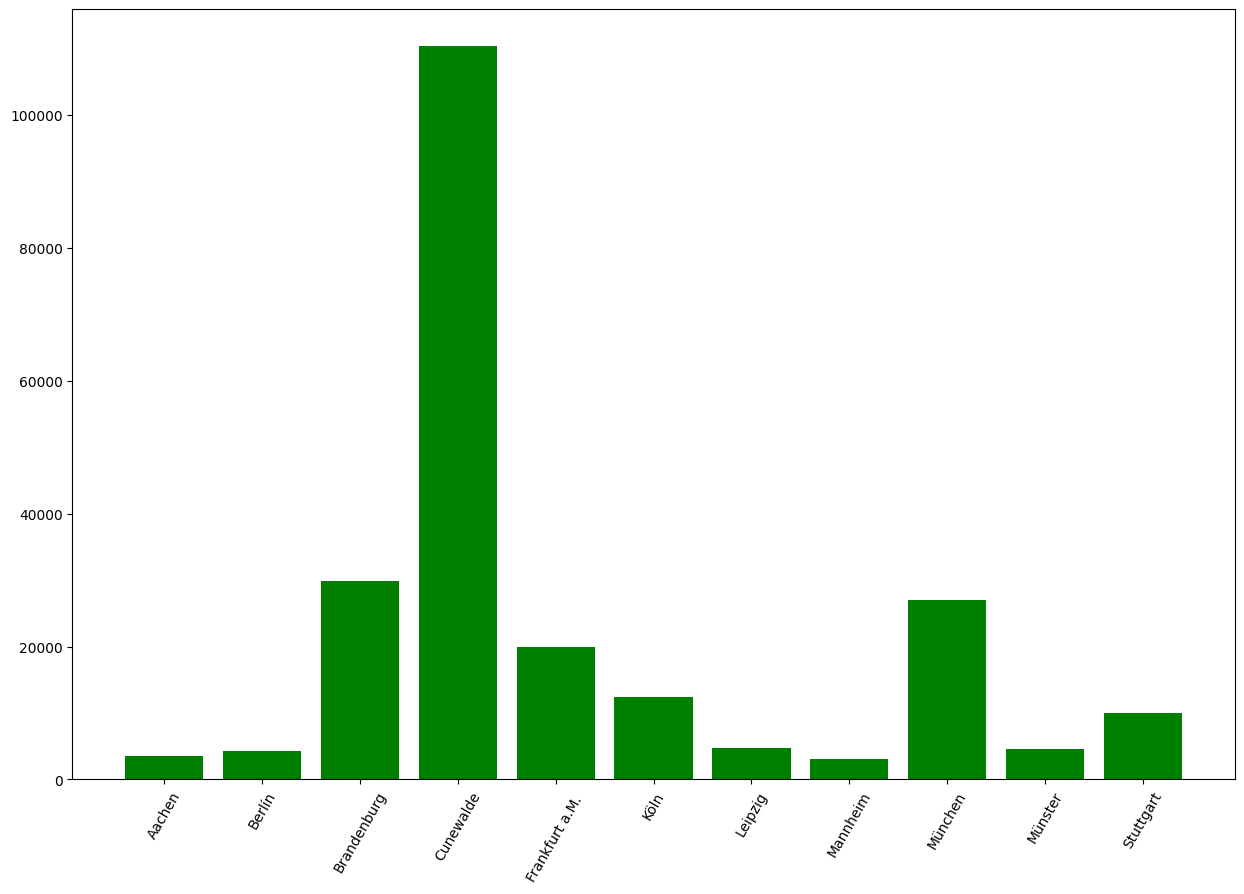

In [55]:
#Grafico de columnas o barras
fig, grafico_barras = plt.subplots()
#Podemos redimensionar la figura:plt.rcParams['figure.figsize']=(ancho,alto)

plt.rcParams['figure.figsize']=(10,10)
grafico_barras.bar(resultado['CiudadDestinatario'], resultado['Importe Neto'], color='green')
#La rotación del texto
plt.xticks(rotation=60)
plt.show()

Proxima clase:
Numpy paratrabajar con matrices
Scikit-learn para crear modelos predictivos